In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re
from PIL import Image

# Restaurants vs COVID-19

## Introduction

In [ ]:
spread= pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])

mapp = spread.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths'].max()
mapp = mapp.reset_index()
mapp['Date'] = pd.to_datetime(mapp['Date'])
mapp['Date'] = mapp['Date'].dt.strftime('%m/%d/%Y')
mapp['size'] = mapp['Confirmed'].pow(0.3)

fig0 = px.scatter_geo(mapp, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(mapp['Confirmed'])+2], animation_frame="Date", 
                     title='Spread over time - COVID-19 Day to Day Track')
fig0.update(layout_coloraxis_showscale=False)
fig0.show()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Thanks to this map we can see that the spread of the COVID-19 is very fast. It started in China and spread to the complete world. At the end, we can see that the United States are among the countries most affected by the pandemic. In this study, we will focus on this country and more specifically on one of the sectors that has been most affected economically: the restaurant and food sector.


For that, we will go through these datasets:
- The Top 500 Chain Restaurant dataset is a measure of the largest restaurant concepts by U.S. systemwide sales, based on results from the 2019 calendar year.
- Top 100 Independents ranking is a dataset of the highest-grossing independent restaurants. Only restaurant concepts with no more than five locations are considered “independents”.
- The Future 50 is a measure of the fastest-growing restaurant concepts with annual sales between 20 million and $50 million.
- And finaly, the *Food_Supply_Quantity_kg_Data* dataset which includes percentage of food intake (in kg) in countries around the world.


And answer these questions:
- What happend to Top Resturants Sales During 2020 with COVID-19?
- What makes difference with sales during COVID-19?
- Have people food behaviour changed during 2020 ?
- Is diet Related to your Infection with Corona?
- Does obesity rate affect impact of COVID-19?

In [ ]:
df_250 = pd.read_csv('Top250.csv')
df_ind = pd.read_csv('Independence100.csv')
df_future = pd.read_csv('Future50.csv')

In [ ]:
df_250 = pd.read_csv('Top250.csv')
df_250.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


# Top 250 Restaurants

## What happend to Top Resturants Sales During 2020 ?

We are going to see some insights of the top 250 restaurants

In [ ]:
# We drop the columns that won't be useful for us
df_250.drop(['Content','Headquarters'],axis=1,inplace=True)

#### Null values checking

In [ ]:
print ("Rows     : " ,df_250.shape[0])
print ("Columns  : " ,df_250.shape[1])
print ("\nFeatures : \n" ,df_250.columns.tolist())
print ("\nMissing values :  ", df_250.isnull().sum().values.sum())
print ("\nUnique values :  \n",df_250.nunique())

Rows     :  250
Columns  :  7

Features : 
 ['Rank', 'Restaurant', 'Sales', 'YOY_Sales', 'Units', 'YOY_Units', 'Segment_Category']

Missing values :   0

Unique values :  
 Rank                250
Restaurant          250
Sales               203
YOY_Sales           172
Units               214
YOY_Units           140
Segment_Category     48
dtype: int64


#### Rename columns

In [ ]:
df_250.rename(columns={'Units':'Branches','Segment_Category':'sub_category'},inplace=True)
df_250

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,sub_category
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger
...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,129,-10.4%,18,-5.3%,Varied Menu
246,247,PDQ,127,-5.5%,56,-11.1%,Chicken
247,248,Lupe Tortilla,127,12.1%,25,8.7%,Mexican
248,249,Cook-Out Restaurant,126,10.1%,270,7.1%,Burger


#### Checking for any independence restaurant in the top 250

In [ ]:
df_future

,"r""Rank""",Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No


In [ ]:
rest_ind = list(df_ind['Restaurant'].values)
df_250['ind_100']=df_250['Restaurant'].apply(lambda x:1 if x in rest_ind else 0 )
df_250['ind_100'].value_counts()

0    250
Name: ind_100, dtype: int64

#### Replace pourcentages by floats

In [ ]:
df_250['YOY_Sales']=df_250['YOY_Sales'].apply(lambda x:x.replace('%',''))
df_250['YOY_Units']=df_250['YOY_Units'].apply(lambda x:x.replace('%',''))

df_250['YOY_Sales']= pd.to_numeric(df_250['YOY_Sales'])
df_250['YOY_Units']=pd.to_numeric(df_250['YOY_Units'])

In [ ]:
df_250.describe()

,Rank,Sales,YOY_Sales,Branches,YOY_Units,ind_100
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.0
mean,125.500000,1242.74000,2.938400,850.076000,1.219200,0.0
std,72.312977,3365.22882,8.953784,2296.151659,7.936431,0.0
min,1.000000,126.00000,-21.200000,13.000000,-32.800000,0.0
25%,63.250000,181.00000,-2.375000,85.000000,-2.025000,0.0
50%,125.500000,330.00000,2.200000,207.000000,0.000000,0.0
75%,187.750000,724.75000,6.575000,555.250000,3.475000,0.0
max,250.000000,40412.00000,39.500000,23801.000000,38.500000,0.0


#### Manipulate with YOY values

**Year on Year sales** correspond to the sales that has been made year to year. This is a popular and effective way to evaluate the financial performance of a company and the performance of investments.
Any measurable event that repeats annually can be compared on a YOY basis.

In [ ]:
df_250['Sales_year']=df_250['YOY_Sales'].apply(lambda x:'positive' if x>0 else 'negative')
df_250['unit_stat']=df_250['YOY_Units'].apply(lambda x:'positive' if x>0 else 'negative')

#### Creating category feature

In [ ]:
df_250['category']=df_250['sub_category'].apply(lambda x:x.replace('Quick Service & Burger','Burger').replace(
                                                      'Italian/Pizza','Pizza').replace('Quick Service & Pizza','Pizza').replace(
'Bakery Cafe ','Cafe').replace('Coffee Cafe','Cafe')).replace('Quick Service & Chicken','Chicken').replace('Casual Dining & Pizza','Pizza').replace(
'Quick Service & Cafe','Cafe').replace('Fast Casual & Pizza','Pizza').replace('Fast Casual & Bakery Cafe','Cafe').replace('Quick Service & Frozen Desserts','Dessert').replace(
'Quick Service & Family Casual','Family').replace('Casual Dining & Asian','Asian').replace('Asian/Noodle','Asian').replace('Casual Dining & Seafood','Seafood').replace(
'Bakery Cafe','Cafe').replace('Frozen Desserts','Dessert').replace('Family Dining & Family Style','Family').replace('Fast Casual & Sandwich','Sandwich').replace(
'Family Casual','Family').replace('Fast Casual & Chicken','Chicken').replace('Fast Casual & Burger','Burger').replace('Casual Dining & Steak','Steak').replace(
'Casual Dining & Sports Bar','Sports Bar').replace('Quick Service & Mexican','Mexican').replace('Quick Service & Mexican','Mexican').replace(
'Quick Service & Seafood','Seafood').replace('Quick Service & Sandwich','Sandwich').replace('Seafodd','Seafood').replace('Fine Dining & Steak','Steak').replace(
'Quick Service & Bakery Cafe','Cafe').replace('Fast Casual & Asian/Noodle','Asia').replace('Quick Service & Snack','Snack').replace(
'Fast Casual & Mexican','Mexican').replace('Quick Service & Beverage','Drinks').replace('Asian','Asia').replace('Sports Bar','Sports Bar').replace(
'Casual Dining & Varied Menu','Varied Menu').replace('Steak','Meat').replace('BBQ','Meat').replace('Family Style','Family')


In [ ]:
df_250.head()

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,sub_category,ind_100,Sales_year,unit_stat,category
0,1,McDonald's,40412,4.9,13846,-0.5,Quick Service & Burger,0,positive,negative,Burger
1,2,Starbucks,21380,8.6,15049,3.0,Quick Service & Coffee Cafe,0,positive,positive,Cafe
2,3,Chick-fil-A,11320,13.0,2470,5.0,Quick Service & Chicken,0,positive,positive,Chicken
3,4,Taco Bell,11293,9.0,6766,2.7,Quick Service & Mexican,0,positive,positive,Mexican
4,5,Burger King,10204,2.7,7346,0.2,Quick Service & Burger,0,positive,positive,Burger


### Year on Year Distribution

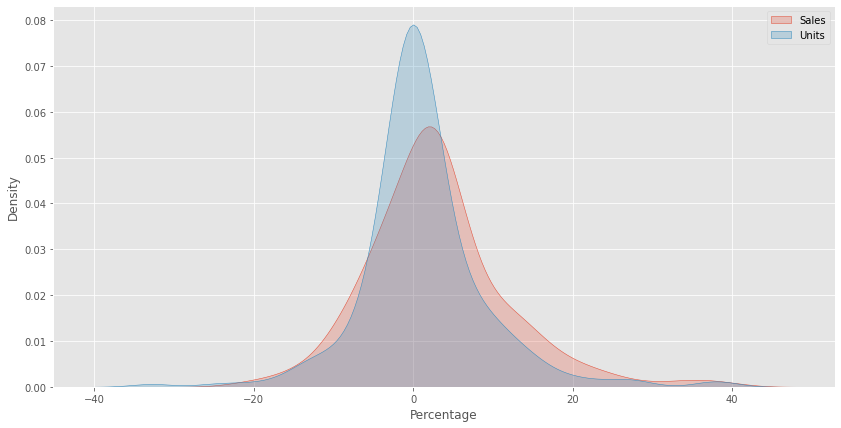

In [ ]:
plt.figure(figsize=(14,7))
sns.kdeplot(df_250['YOY_Sales'].values, shade = True)
sns.kdeplot(df_250['YOY_Units'].values, shade = True)
plt.legend(['Sales','Units'])
plt.xlabel('Percentage');

These Distributions shows us that year on year sales percentage no more than 40%

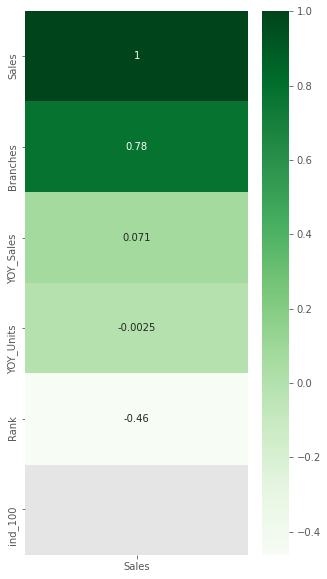

In [ ]:
corr = df_250.corr().loc[:,['Sales']]

fig, ax = plt.subplots(figsize=(5,10))

ax = sns.heatmap(corr.sort_values(by=['Sales'],ascending=False), ax=ax,annot=True,cbar=True,cmap="Greens")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

We can observe that sales are high correlated with branches.

### Year on Year Sales Indicator

In [ ]:
plt.figure(figsize=(14,7));
Platform = df_250['Sales_year'].value_counts(sort = True).index
Count = df_250['Sales_year'].value_counts(sort = True)

fig2 = px.pie(names = Platform,
             values = Count,
             title='Year on year sales of the top 250 restaurants')
fig2.update_traces(textposition='inside', textinfo='percent+label')

<Figure size 1008x504 with 0 Axes>

Although the restaurants were on the best list during the year, about 35% of restaurants had negative indicators

In [ ]:
plt.figure(figsize=(40,40));
df = px.data.tips()
fig3= px.sunburst(df_250, path=['category', 'sub_category'], values='Sales',
                 title="Importance of Quick Services in sales")
fig3.show()

<Figure size 2880x2880 with 0 Axes>

This sunburst chart shows that quick-service subcategory always get high sales.

We can explain this by the pandemic of COVID-19 : restaurants are closed and only propose take away food offers. So the more profitable sub category is the Quick Service no matter what is the category.

## Category Sales Indicator

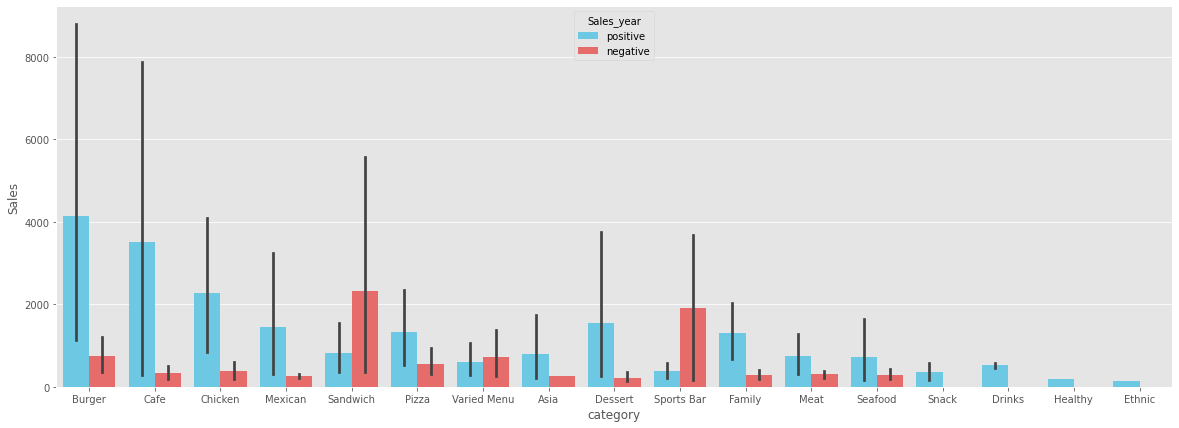

In [ ]:
plt.figure(figsize=(20,7))

pal = ["#58D3F7","#FA5858"]

sns.barplot(data=df_250,x=df_250['category'],y=df_250['Sales'],hue=df_250['Sales_year'],palette=pal);

The categories varied menu, sandwiches and sports bar had more negative indicators than positive. It can be explained that those categories are less attractive in this period with the pandemic. The sales are higher for the other categories.

## Top Resturants In Best Category

Pizza 🍕

In [ ]:
pizza = df_250.query("category == 'Pizza'")[:10]

fig = px.bar(pizza,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Viridis',
             title='Pizza Sales Top Restaurants')
fig.show()

Burger 🍔

In [ ]:
Burger = df_250.query("category == 'Burger'")[:10]

fig4 = px.bar(Burger,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='BlackBody',
             title='Burger Top Restaurants')
fig4.show()

Varied Menu ✔️

In [ ]:
VariedMenu = df_250.query("category == 'Varied Menu'")[:10]

fig = px.bar(VariedMenu,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Plotly3',
             title='VariedMenu Top Restaurants')
fig.show()

Family 👪

In [ ]:
Family = df_250.query("category == 'Family'")[:10]

fig = px.bar(Family,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Turbo',
             title='Family Top Restaurants')
fig.show()

Meat 🥩

In [ ]:
Meat = df_250.query("category == 'Meat'")[:10]

fig = px.bar(Meat,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Jet',
             title='Meat Top Restaurants')
fig.show()

Mexican 🌮

In [ ]:
Mexican = df_250.query("category == 'Mexican'")[:10]

fig = px.bar(Mexican,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Aggrnyl',
             title='Mexican Top Restaurants')
fig.show()

Cafe ☕

In [ ]:
Cafe = df_250.query("category == 'Cafe'")[:10]

fig = px.bar(Cafe,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Darkmint',
             title='Cafe Top Restaurants')
fig.show()

Sandwich 🥪

In [ ]:
Sandwich = df_250.query("category == 'Sandwich'")[:10]

fig = px.bar(Sandwich,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Magenta',
             title='Sandwich Top Restaurants')
fig.show()

Chicken 🐔

In [ ]:
Chicken = df_250.query("category == 'Chicken'")[:10]

fig = px.bar(Chicken,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Brwnyl',
             title='Chicken Top Restaurants')
fig.show()

Drinks 🍸

In [ ]:
Drinks = df_250.query("category == 'Drinks'")[:10]

fig = px.bar(Drinks,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='thermal',
             title='Drinks Top Restaurants')
fig.show()

### What happend to Top 250 Resturants Sales During 2020 ?

1-Number of Branches is the Highest Correlated column with Sales

2-35% Year on year for Top Restaurants are Negative

3-Burger Restaurants represent the highest Sales in 2020

4-Quick Service is an optimal solution to get high sales

5-Sports Bar and Sandwich Restaurants face Big losses

# Top 50 Future Restaurants

## What can we expect for the top 50 future restaurants ?

In [ ]:
df_future.head(10)

,"r""Rank""",Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No


### How many restaurants from the future top 50 are franchising ?

In [ ]:
Platform = df_future['Franchising'].value_counts(sort = True).index
Count = df_future['Franchising'].value_counts(sort = True)
#====
fig5 = px.pie(names = Platform,
             values = Count,
             title='Are the restaurants from the future top 50 franchising ?')
fig5.update_traces(textposition='inside', textinfo='percent+label')

### Sales of restaurants depending on franchising

In [ ]:
df_future['YOY_Sales']=df_future['YOY_Sales'].apply(lambda x:x.replace('%',''))
#====
df_future['YOY_Sales']= pd.to_numeric(df_future['YOY_Sales'])
#===
franch = df_future.groupby('Franchising',as_index=False).agg({'YOY_Sales':'sum'})
fig = px.bar(franch,
             x='Franchising',
             y='YOY_Sales',
             color='YOY_Sales',
             color_continuous_scale='thermal',
             title='Year on year sales of restaurants depending on franchising')
fig.show()

### Correlation with Year on year sales

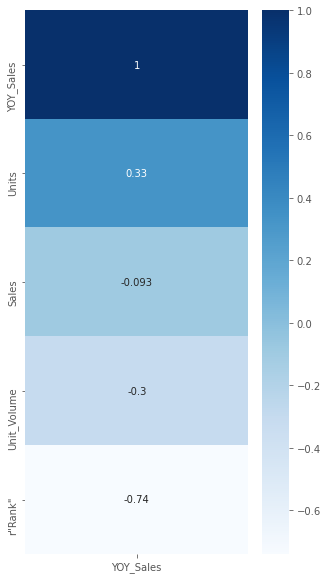

In [ ]:
corr = df_future.corr().loc[:,['YOY_Sales']]

fig, ax = plt.subplots(figsize=(5,10))

ax = sns.heatmap(corr.sort_values(by=['YOY_Sales'],ascending=False), ax=ax,annot=True,cbar=True,cmap="Blues")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

The rank is the highest anti correlated with the year on year sales.

None of them are highly correlated with the year on year sales.

### What can we expect for the top 50 future restaurants ?

1- 58% of the future top 50 restaurants are franchising

2- Year on year sales are higher when franchising

3- No big correlation between year on year sales and the other features

## Have people food behaviour changed during 2020 ?

The Future 50 is a measure of the fastest-growing restaurant concepts.


In [ ]:
df_future['City'] = df_future['Location'].str.split(',', expand=True)[0].str.strip()
df_future['State'] = df_future['Location'].str.split(',', expand=True)[1].str.strip()
df_future.drop(['Location'], axis=1, inplace=True)

fig7 = px.treemap(data_frame=df_future, path=['State'], values='Units', color_continuous_scale='RdBu', color='r"Rank"', 
                 title="Fastest-growing restaurant concepts Treemap")
fig7.show()

California, New York and North Carolina have the most restaurants. Not a surprise since these states are innovation hubs.

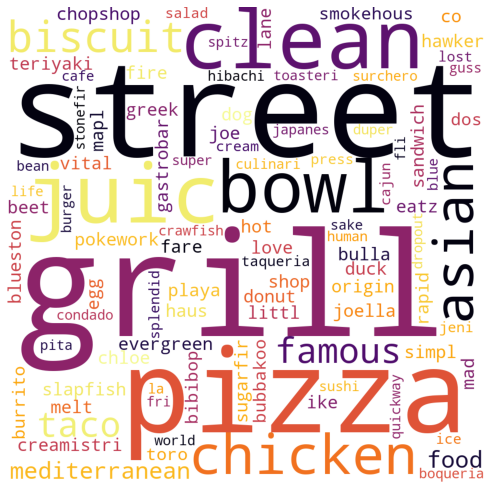

In [ ]:
rest = df_future['Restaurant'].drop_duplicates()
#==== 
all_sentences = []

for word in rest:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
     lines.append(w)
#=== 


lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

stem2 = []

for word in stem:
    stem2.append(word)
#== 
df = pd.DataFrame(stem) 
rest_All = " ".join(rest for rest in df[0])

wc = WordCloud(background_color='white', mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_color='indigo',colormap='inferno').generate(rest_All)
plt.figure(figsize=(7, 12))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

From the WordCloud above, based on the words of the restaurants names, we can see that most of them depend on clean and organic food.

In an effort to protect themselves against COVID-19, americans are prioritizing nutrition and immunity-boosting ingredients. That's why the demand for organic foods rises. 

## Is diet related to your infection with COVID-19?

Now we are trying to find if there is a relationship between some food products and the high rates of infection with COVID-19.

For that, we will use the *Food_Supply_Quantity_kg_Data* dataset which includes percentage of food intake (in kg) in countries around the world. The last couple of columns also includes counts of obesity, undernourished, and COVID-19 cases as percentages of the total population for comparison purposes.

In [ ]:
df_health = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')
df_health = df_health.drop('Unit (all except Population)', axis = 1)
df_health = df_health.dropna()
df_health.loc[df_health['Undernourished'] == '<2.5', 'Undernourished'] = '2.0'
df_health['Undernourished'] = pd.to_numeric(df_health['Undernourished'])

We need to manipulate features in the dataset in order to gather products by categories as follows.

In [ ]:
df_health['Alcohol']=df_health['Alcoholic Beverages']
df_health['animal_products']=df_health['Animal Products']+df_health['Eggs']+df_health['Animal fats']+df_health['Meat']+df_health['Fish, Seafood']+df_health['Aquatic Products, Other']+df_health['Milk - Excluding Butter']
df_health['vegan products']=df_health['Fruits - Excluding Wine']+df_health['Oilcrops']+df_health['Pulses']+df_health['Spices']+df_health['Starchy Roots']+df_health['Sugar Crops']+df_health['Treenuts']+df_health['Vegetable Oils']+df_health['Vegetables']+df_health['Vegetal Products']
df_health['manufactured product']=df_health['Stimulants']+df_health['Sugar & Sweeteners']
df_health['other']=df_health['Miscellaneous']+df_health['Offals']

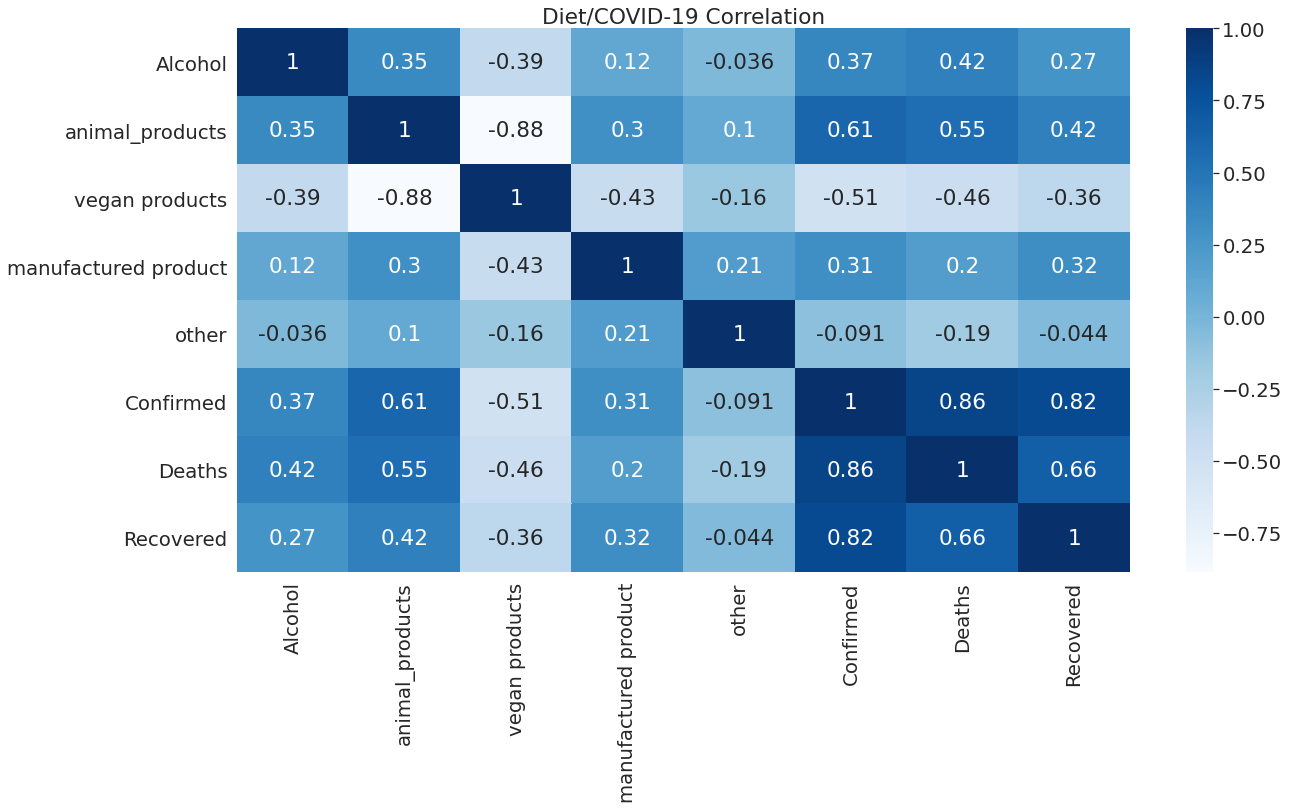

In [ ]:
sns.set(font_scale=1.8)
plt.figure(figsize=(20,10))
df_behav=df_health[['Alcohol','animal_products','vegan products','manufactured product','other','Confirmed', 'Deaths',
       'Recovered']]
sns.heatmap(df_behav.corr(),annot=True,cmap="Blues")
plt.title('Diet/COVID-19 Correlation')
plt.show()

We notice here that vegan products have an inverse relationship (-0.51) with the number of confirmed cases. However animal products have a positive correlation (0.61) with it. So, a vegan diet might be a good way to protect ourselves against the virus. Moreover, this correlation visualisation brings a logical explanation for why evergreens restaurant was the most increase in sales rates during the COVID-19 pandemic.

In [ ]:
df_veg=df_health[['Country','Alcohol','animal_products','vegan products','manufactured product','other','Confirmed', 'Deaths',
       'Recovered']]
fig8 = px.choropleth(df_veg, 
                    locations='Country', locationmode='country names',
                    color='Confirmed', hover_name='vegan products', 
                    color_continuous_scale="Peach", hover_data=['vegan products'],
                    title="Confiremed cases percentage hovering with vegan products")
fig8.update(layout_coloraxis_showscale=False)
fig8.show();

We will notice here the negative correlation between confirmed cases and veg_product.

## Does obesity rate affect impact of COVID-19?

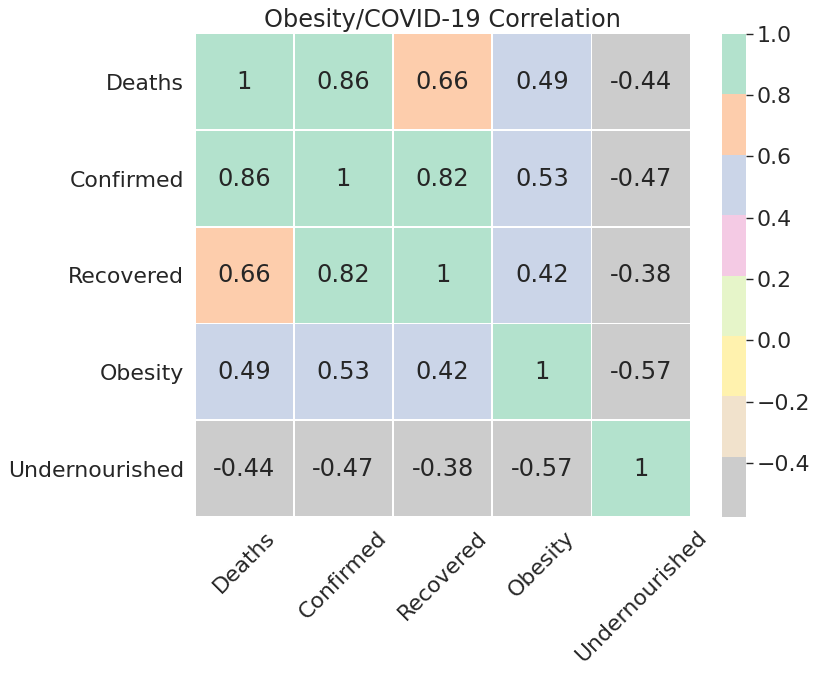

In [ ]:
corr_heatmap=df_health[['Deaths','Confirmed','Recovered','Obesity','Undernourished']]
x=corr_heatmap.corr(method='pearson')
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(x,cmap='Pastel2_r',annot=True,linewidth=0.6)
plt.title('Obesity/COVID-19 Correlation')
plt.xticks(rotation=45)
plt.show()

We can see that obesity has a stronger correlation with covid deaths (0.49) than recovery (0.42) and undernourished patients has a stronger correlation with covid recovery (-0.38) than deaths (-0.44).

This could mean that in average, obese patients are most likely to die from covid while undernourished are most likely to survive.

Let's plot the Obesity rate against Mortality.

In [ ]:
fig9 = px.scatter(df_health[df_health.Country != 'Yemen'], x="Deaths", y = "Obesity", size = "Active", hover_name='Country', log_x=False, size_max=30, template="simple_white")

fig9.add_shape(
        # Line Horizontal

            type="line",
            x0=0,
            y0=df_health[df_health.Country != 'Yemen']['Obesity'].mean(),
            x1=df_health[df_health.Country != 'Yemen']['Deaths'].max(),
            y1=df_health[df_health.Country != 'Yemen']['Obesity'].mean(),
            line=dict(
                color="crimson",
                width=4
            ),
    )
fig9.show()

The red line represents the obesity mean around the world.
From this graph, we can clearly deduce that countries, with an obesity rate superior to the world's mean, have more deaths on the clock. The US stands out !

## Conclusion
- Americans are prioritizing nutrition and immunity-boosting ingredients.
- Going vegan can reduce severity of COVID-19.
- Obesity worsens outcomes from COVID-19.


# Our dashboard

In [ ]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd

#Load Data
#data = pd.read_csv("data.csv")
df = px.data.tips()

#Build App
app = JupyterDash(__name__)


app.layout = html.Div([
    
    dcc.Graph(figure=fig0),
    
    dcc.Graph(figure=fig2),
    
    dcc.Graph(figure=fig3),
    
    dcc.Graph(figure=fig4),
    
    dcc.Graph(figure=fig5),
    
    dcc.Graph(figure=fig),
    
    dcc.Graph(figure=fig7),
    
    dcc.Graph(figure=fig8),
    
    dcc.Graph(figure=fig9),
    
])

#Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)

def update_figure(colorscale):
    return px.scatter(
        df, x = "total_bill", y = "tip", color = "size",
        color_continuous_scale = colorscale,
        render_mode = "webg1", title = "Tips"
    )

#Run app and display result inline in the notebook
app.run_server(mode = 'inline')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ebd8e12e-ad48-44fc-bd91-e3956ba35dcf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>